# Forecasting using the Triple Exponential or The Holt - Winters Method 

In [22]:
# standard import #
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# ignore the unwanted warnings #
import warnings
warnings.filterwarnings(action='ignore')

In [75]:
# ensure the standard size of all the visualizations #
from pylab import rcParams
rcParams['figure.figsize']=12,5

In [5]:
# import the airline passenger dataset #
airline = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [6]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
airline.shape

(144, 1)

In [8]:
airline.dropna(inplace=True)

In [10]:
airline.shape

(144, 1)

In [11]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


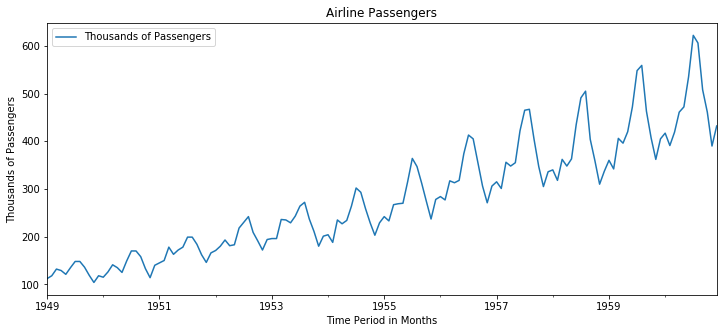

In [18]:
# plot the dataframe #
ax = airline.plot()
ax.set(title='Airline Passengers')
ax.set(xlabel='Time Period in Months',ylabel='Thousands of Passengers');

In [19]:
# decompose the data to understand the trend and seasonality #
from statsmodels.tsa.seasonal import seasonal_decompose

In [35]:
decompose = seasonal_decompose(airline['Thousands of Passengers'],period=12)

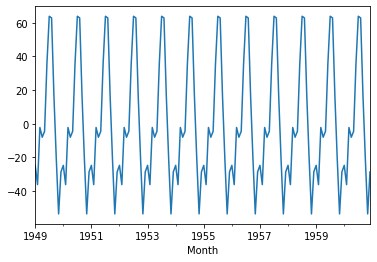

In [38]:
decompose.seasonal.plot()

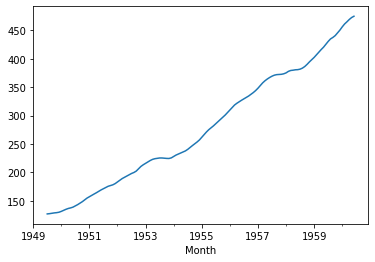

In [40]:
decompose.trend.plot()

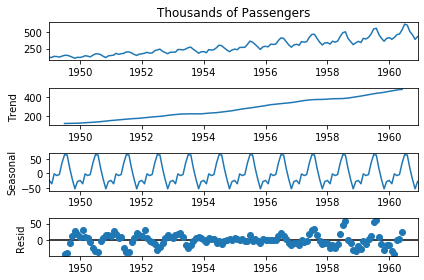

In [42]:
decompose.plot();

In [30]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [31]:
airline.index.freq = 'MS'

In [32]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [44]:
# import the holt-winters model from the statsmodels library #
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [45]:
help(ExponentialSmoothing)

Help on class ExponentialSmoothing in module statsmodels.tsa.holtwinters:

class ExponentialSmoothing(statsmodels.tsa.base.tsa_model.TimeSeriesModel)
 |  ExponentialSmoothing(endog, trend=None, damped=False, seasonal=None, seasonal_periods=None, dates=None, freq=None, missing='none')
 |  
 |  Holt Winter's Exponential Smoothing
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      Time series
 |  trend : {"add", "mul", "additive", "multiplicative", None}, optional
 |      Type of trend component.
 |  damped : bool, optional
 |      Should the trend component be damped.
 |  seasonal : {"add", "mul", "additive", "multiplicative", None}, optional
 |      Type of seasonal component.
 |  seasonal_periods : int, optional
 |      The number of periods in a complete seasonal cycle, e.g., 4 for
 |      quarterly data or 7 for daily data with a weekly cycle.
 |  
 |  Returns
 |  -------
 |  results : ExponentialSmoothing class
 |  
 |  Notes
 |  -----
 |  This is a full implementatio

In [46]:
# split the data into training and testing dataset #
len(airline)

144

In [47]:
train = airline.iloc[:132]
test = airline.iloc[132:]

In [48]:
hwmodel = ExponentialSmoothing(train['Thousands of Passengers'],trend='add',seasonal='add',
                              seasonal_periods=12)

In [49]:
hwfit = hwmodel.fit()

In [66]:
test_forecast = hwfit.forecast(steps=12).rename('Test Forecast')

In [67]:
test_forecast

1960-01-01    417.826543
1960-02-01    400.452917
1960-03-01    461.804260
1960-04-01    450.787210
1960-05-01    472.695906
1960-06-01    528.560826
1960-07-01    601.265798
1960-08-01    608.370405
1960-09-01    508.869853
1960-10-01    452.958732
1960-11-01    407.634396
1960-12-01    437.385063
Freq: MS, Name: Test Forecast, dtype: float64

In [68]:
test

,Thousands of Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [72]:
#create a dataframe of true test values vs the forecasted values #
test['Model Forecast'] = test_forecast.values

In [73]:
test.head()

,Thousands of Passengers,Model Forecast
Month,,
1960-01-01,417,417.826543
1960-02-01,391,400.452917
1960-03-01,419,461.804260
1960-04-01,461,450.787210
1960-05-01,472,472.695906


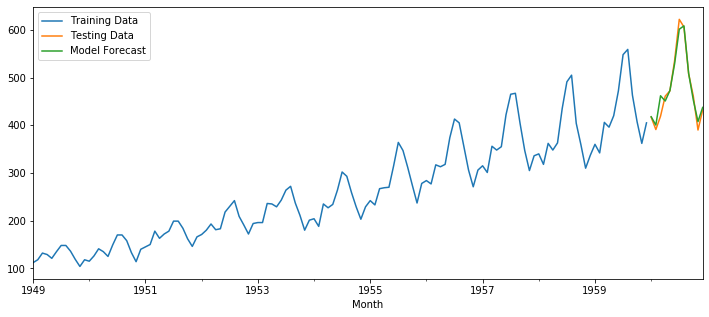

In [78]:
train['Thousands of Passengers'].plot(legend=True,label='Training Data')
test['Thousands of Passengers'].plot(legend=True,label='Testing Data')
test_forecast.plot(legend=True,label='Model Forecast');

In [80]:
# Model evaluation #
from sklearn.metrics import mean_squared_error

In [82]:
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'],test_forecast))

In [83]:
print (f'Mean Squared Error = {rmse}')

Mean Squared Error = 15.570830861607387


In [85]:
test.describe()

,Thousands of Passengers,Model Forecast
count,12.000000,12.000000
mean,476.166667,479.050992
std,77.737125,69.792102
min,390.000000,400.452917
25%,418.500000,432.495433
50%,461.000000,457.381496
75%,514.750000,513.792596
max,622.000000,608.370405


# Train the model onto the entire dataset 

In [86]:
hwmodel = ExponentialSmoothing(airline['Thousands of Passengers'],
                              trend='add',seasonal='add',seasonal_periods=12)

In [87]:
hwfit = hwmodel.fit()

In [88]:
hwforecast = hwfit.forecast(12)

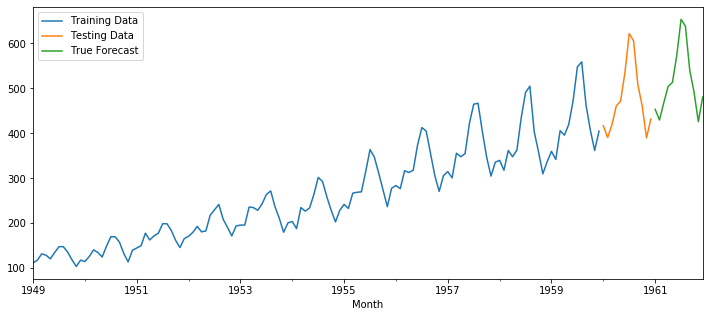

In [89]:
train['Thousands of Passengers'].plot(legend=True,label='Training Data')
test['Thousands of Passengers'].plot(legend=True,label='Testing Data')
hwforecast.plot(legend=True,label='True Forecast');

# Stationarity 

In [90]:
samples = pd.read_csv('../Data/samples.csv',index_col=0,parse_dates=True)

In [117]:
samples.head()

,a,b,c,d,d1b,d1b-pandas
1950-01-01,36,27,0,67,NaN,NaN
1950-02-01,58,22,3,31,-5.0,-5.0
1950-03-01,61,17,5,67,-5.0,-5.0
1950-04-01,37,15,8,47,-2.0,-2.0
1950-05-01,66,13,8,62,-2.0,-2.0


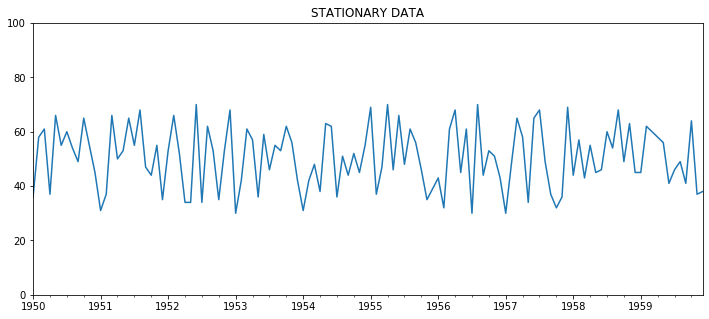

In [93]:
ax = samples['a'].plot(ylim=[0,100])
ax.autoscale(axis='X',tight=True)
ax.set(title='STATIONARY DATA');

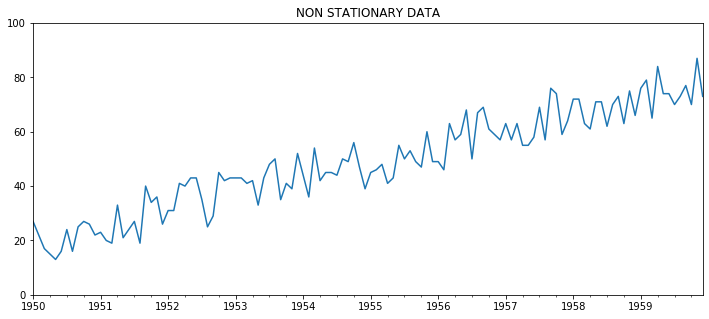

In [94]:
ax = samples['b'].plot(ylim=[0,100])
ax.autoscale(axis='X',tight=True)
ax.set(title='NON STATIONARY DATA');

# Differencing 

## First Order Differencing 

In [98]:
# calculate the first difference of the non stationary data #
samples['d1b'] = samples['b'] - samples['b'].shift(1)

In [99]:
samples

,a,b,c,d,d1b
1950-01-01,36,27,0,67,NaN
1950-02-01,58,22,3,31,-5.0
1950-03-01,61,17,5,67,-5.0
1950-04-01,37,15,8,47,-2.0
1950-05-01,66,13,8,62,-2.0
...,...,...,...,...,...
1959-08-01,49,73,9338,58,3.0
1959-09-01,41,77,9502,38,4.0
1959-10-01,64,70,9667,42,-7.0
1959-11-01,37,87,9833,62,17.0


In [100]:
# using the pandas built in diff function to achieve the differencing #
samples['d1b-pandas'] = samples['b'].diff(1)

In [101]:
samples.head()

,a,b,c,d,d1b,d1b-pandas
1950-01-01,36,27,0,67,NaN,NaN
1950-02-01,58,22,3,31,-5.0,-5.0
1950-03-01,61,17,5,67,-5.0,-5.0
1950-04-01,37,15,8,47,-2.0,-2.0
1950-05-01,66,13,8,62,-2.0,-2.0


#### Forecasting on the first order differenced data 

In [104]:
samples[['b']].tail(3)

,b
1959-10-01,70
1959-11-01,87
1959-12-01,73


In [109]:
# create a datarange starting from the next subsequent time, use the same frequenc as in the dataset#
idx = pd.date_range(start='1960-01-01',periods=7,freq='MS')

In [110]:
idx

DatetimeIndex(['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [111]:
# assume some forecast values #
fcast =  [7,2,3,-1,4,9,0]

In [112]:
# create the dataframe #
z = pd.DataFrame(data=fcast,index=idx,columns=['Diff Forecast'])

In [113]:
z.head()

,Diff Forecast
1960-01-01,7
1960-02-01,2
1960-03-01,3
1960-04-01,-1
1960-05-01,4


In [116]:
z['forecast']= samples['b'].iloc[-1] + z['Diff Forecast'].cumsum()

In [118]:
samples['b'].head()

1950-01-01    27
1950-02-01    22
1950-03-01    17
1950-04-01    15
1950-05-01    13
Name: b, dtype: int64

In [119]:
samples['b'].iloc[-1]

73

In [121]:
samples['b'].tail()

1959-08-01    73
1959-09-01    77
1959-10-01    70
1959-11-01    87
1959-12-01    73
Name: b, dtype: int64

In [122]:
z['Diff Forecast'].cumsum()

1960-01-01     7
1960-02-01     9
1960-03-01    12
1960-04-01    11
1960-05-01    15
1960-06-01    24
1960-07-01    24
Freq: MS, Name: Diff Forecast, dtype: int64

In [123]:
z

,Diff Forecast,forecast
1960-01-01,7,80
1960-02-01,2,82
1960-03-01,3,85
1960-04-01,-1,84
1960-05-01,4,88
1960-06-01,9,97
1960-07-01,0,97
